In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter
import math

In [21]:
n_measurements = 20 #no. of different values used
max_gRate = 0.083
immigration_rate = 0.8
K = 10000
#when deterioration greater than this value we change from immigration dominated to deterioration dominated
phase2_lim = immigration_rate/K 
phase2_lim_scaled = phase2_lim/max_gRate

N_thresh_min = 0. #range of values for N*
N_thresh_max = 1.5
delta_N_thresh = (N_thresh_max - N_thresh_min)/n_measurements

det_ratio_min = 0. #range of values for deterioration ratio
det_ratio_max = 1.5
delta_det_ratio = (det_ratio_max - det_ratio_min)/n_measurements

In [52]:
df2 = pd.read_csv("timeTo1Microhab_phaseDiagram_bigK/mhLim-1_N^-1.500_rDet-0.225.csv")
new_df = pd.DataFrame(df.mean().to_dict(),index=[df.index.values[-1]])
new_df["time_to_n_stDev"] = df2["time_to_n"].std()
new_df

,n_thresh,det_ratio,time_to_n,time_elapsed,time_to_n_stDev
23,1.5,1.5,0.0,256.048917,0.381644


In [70]:
df_list = [] #empty list to hold all the dataframes
#iterate through all the seperate csv files and append them to the list
for n in range(n_measurements+1):
    for d in range(n_measurements+1):
        n_thresh = N_thresh_min + n*(delta_N_thresh)
        det_ratio = det_ratio_min + d*(delta_det_ratio)
        
        n_thresh_str = "{:.3f}".format(n_thresh)
        det_ratio_str = "{:.3f}".format(det_ratio)
        
        df = pd.read_csv("timeTo1Microhab_phaseDiagram_bigK/mhLim-1_N^-"+n_thresh_str+"_rDet-"+det_ratio_str+".csv")
        df['time_to_n'] = df['time_to_n']/max_gRate
        
        averaged_df = pd.DataFrame(df.mean().to_dict(),index=[df.index.values[-1]])
        averaged_df["time_to_n_stDev"] = df["time_to_n"].std()

        df_list.append(averaged_df)
        

In [86]:
#add all the dataframes together
param_data = pd.concat(df_list ,ignore_index=True)
#param_data = param_data.rename({'det_rate_ratio': 'det_rate'}, axis='columns')
#param_data['det_ratio'] = param_data['det_rate']/max_gRate
#param_data['time_adjusted'] = 0 if math.isclose(param_data['time_to_n'], 0) and param_data["time_elapsed"] > 5e5

# if param_data['time_to_n'] == 0 and param_data["time_elapsed"] > 5e5:
#     param_data['time_adjusted'] = 0.
    
# elif param_data['time_to_n'] == 0  and param_data["time_elapsed"] < 5e5:
#     param_data['time_adjusted'] = None
    
# else: param_data['time_adjusted'] = param_data['time_to_n']
#filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
param_data['tN_adjusted'] = param_data["time_to_n"]
param_data['tN_adjusted'][(param_data['time_to_n'] == 0.) & (param_data['time_elapsed'] > 5e5)] = 0.
param_data['tN_adjusted'][(param_data['time_to_n'] == 0.) & (param_data['time_elapsed'] < 5e5)] = None

param_data['tN_stDev_adjusted'] = param_data["time_to_n_stDev"]
param_data['tN_stDev_adjusted'][(param_data['time_to_n'] == 0.) & (param_data['time_elapsed'] > 5e5)] = 0.
param_data['tN_stDev_adjusted'][(param_data['time_to_n'] == 0.) & (param_data['time_elapsed'] < 5e5)] = None

param_data['stochasticity'] = param_data['tN_stDev_adjusted']
param_data['stochasticity'][(param_data['stochasticity'] > 0.) & param_data['stochasticity']] = param_data['tN_stDev_adjusted']/param_data['tN_adjusted']

param_data[param_data['time_to_n'] > 0]

,n_thresh,det_ratio,time_to_n,time_elapsed,time_to_n_stDev,tN_adjusted,tN_stDev_adjusted,stochasticity
21,0.075,0.000,12.349398,9.000000e+09,0.532923,12.349398,0.532923,0.043154
22,0.075,0.075,12.399598,9.000000e+09,0.559404,12.399598,0.559404,0.045115
23,0.075,0.150,12.600402,9.000000e+09,0.613226,12.600402,0.613226,0.048667
24,0.075,0.225,12.449799,9.000000e+09,0.680313,12.449799,0.680313,0.054644
25,0.075,0.300,12.550201,9.000000e+09,0.606759,12.550201,0.606759,0.048347
...,...,...,...,...,...,...,...,...
423,1.500,0.225,311.445783,9.000000e+09,4.598121,311.445783,4.598121,0.014764
424,1.500,0.300,354.066265,9.000000e+09,3.368158,354.066265,3.368158,0.009513
425,1.500,0.375,416.277610,9.000000e+09,6.551362,416.277610,6.551362,0.015738
426,1.500,0.450,530.007530,9.000000e+09,15.537694,530.007530,15.537694,0.029316


In [72]:
pivot = param_data.pivot(index='n_thresh', columns='det_ratio', values='tN_adjusted')

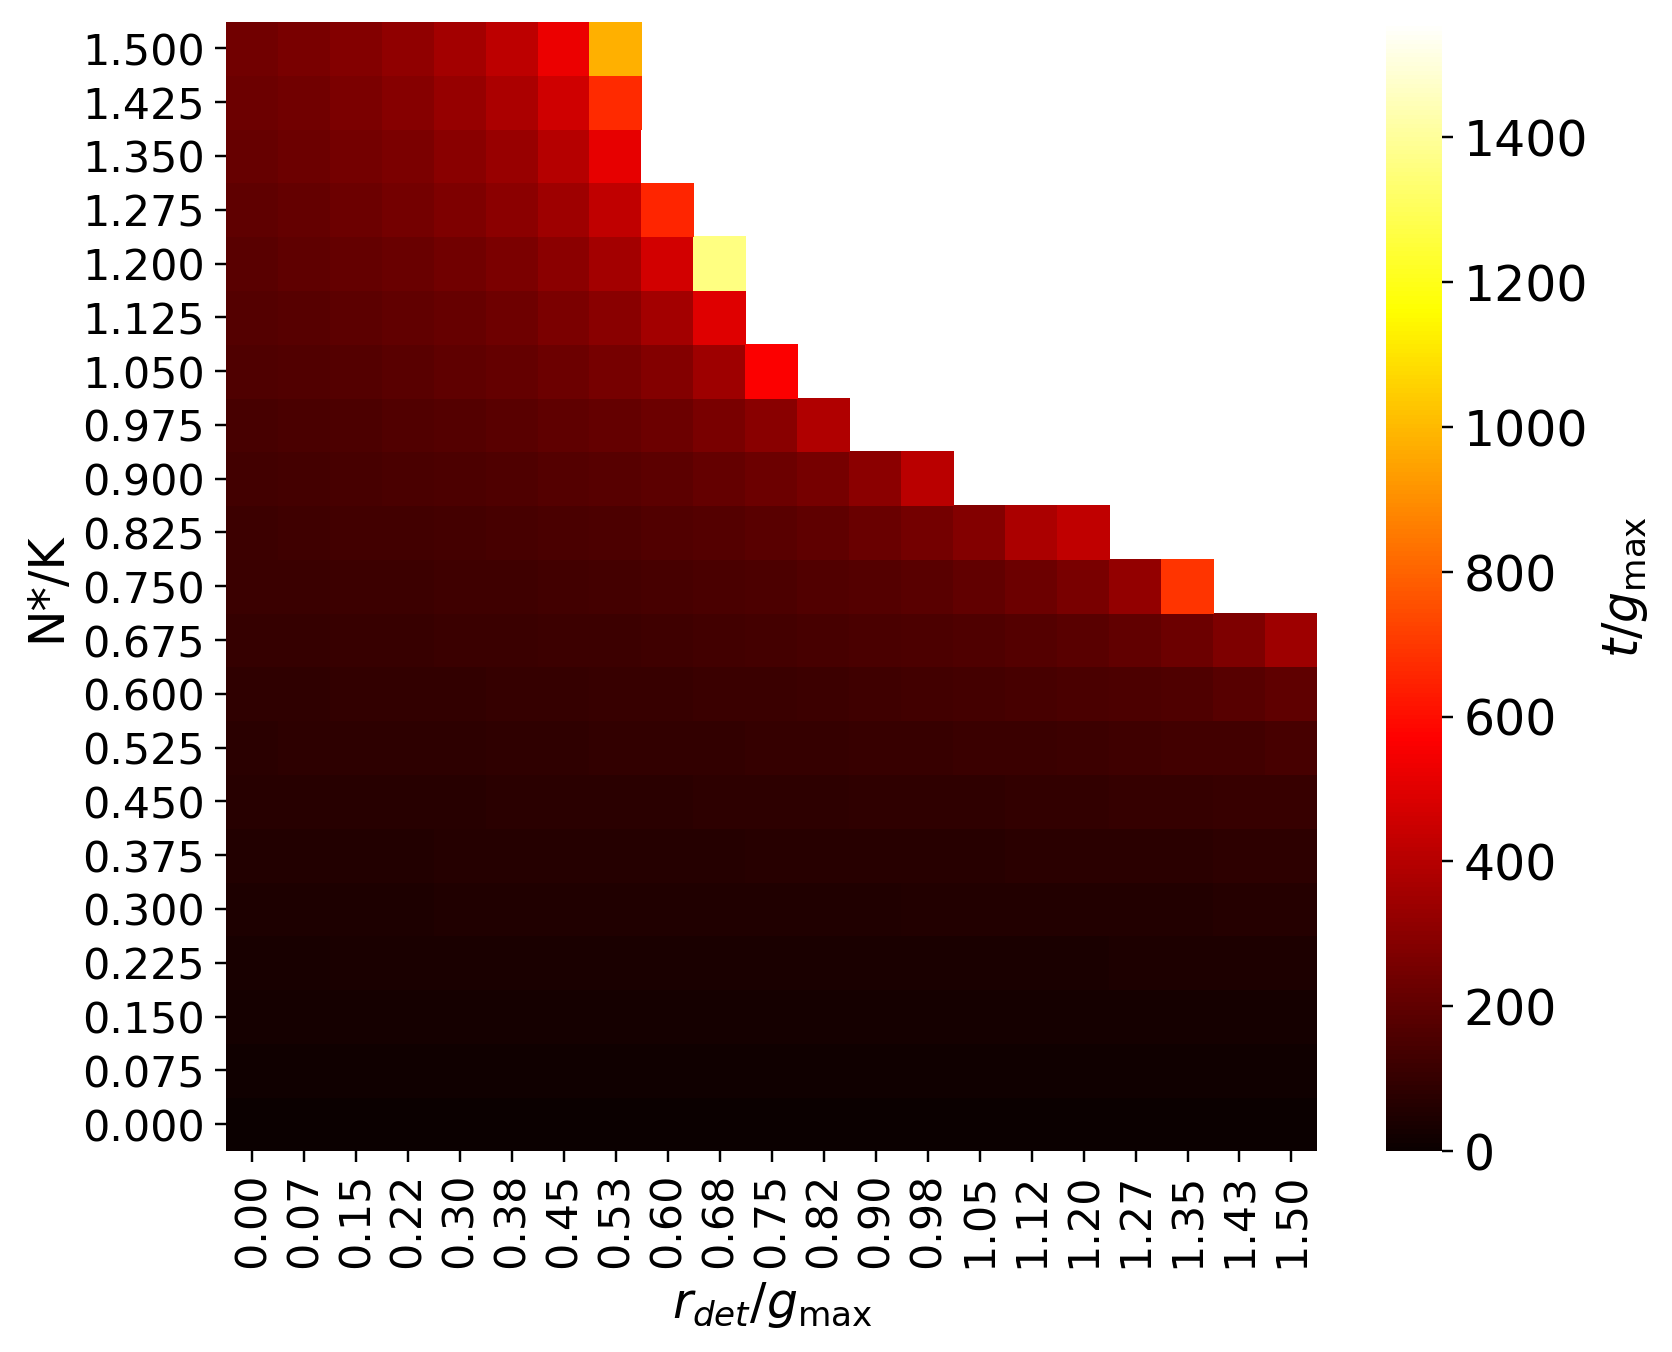

In [92]:
fig, ax = plt.subplots(dpi=220)
fig.set_size_inches(8, 6.8)
titleSize = 16
labelSize = 16
numbersize = 14
legendsize = 10
IDsize=12


# #this mask will only plot values between 15 and 20
# masko = (pivot < 15) | (pivot >= 20)

# #phase_mask = (pivot['det_ratio']) > 0.5

ax = sns.heatmap(pivot, annot=False, cmap='hot')
# ax_masked = sns.heatmap(pivot, mask=masko, cmap='Greens', cbar=False, annot=True)
# #ax_masked2 = sns.heatmap(pivot, mask=phase_mask, cmap='Blues', cbar=False, annot=True)

ax.invert_yaxis()
labels_x = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(map(lambda x: "{:.2f}".format(float(x)), labels_x))
labels_y = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(map(lambda y: "{:.3f}".format(float(y)), labels_y))

# ax2 = ax.twiny()
# ax2.set_xlim(0.078, 0.92)
# ax2.axvline(x=phase2_lim/max_gRate, linewidth=4, color='r')
# print(phase2_lim/max_gRate)

ax.set_xlabel('$r_{det}/g_{\max}$', fontsize=labelSize)
ax.set_ylabel('N*/K', fontsize=labelSize)
ax.xaxis.set_tick_params(labelsize=numbersize)
# ax2.xaxis.set_tick_params(labelsize=numbersize+5)
ax.yaxis.set_tick_params(labelsize=numbersize)

# ax2.set_xticks([phase2_lim_scaled])
# ax2.set_xticklabels(["$\\frac{r_{imm}}{g_{\max}K}$"])

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelSize)
cbar.set_label("$t/g_{\max}$", fontsize=labelSize)

plt.savefig('phase_diagram_plots/timeTo1Mh_heatmap.pdf', bbox_inches='tight')
plt.show()

In [89]:
pivot_stDev = param_data.pivot(index='n_thresh', columns='det_ratio', values='stochasticity')

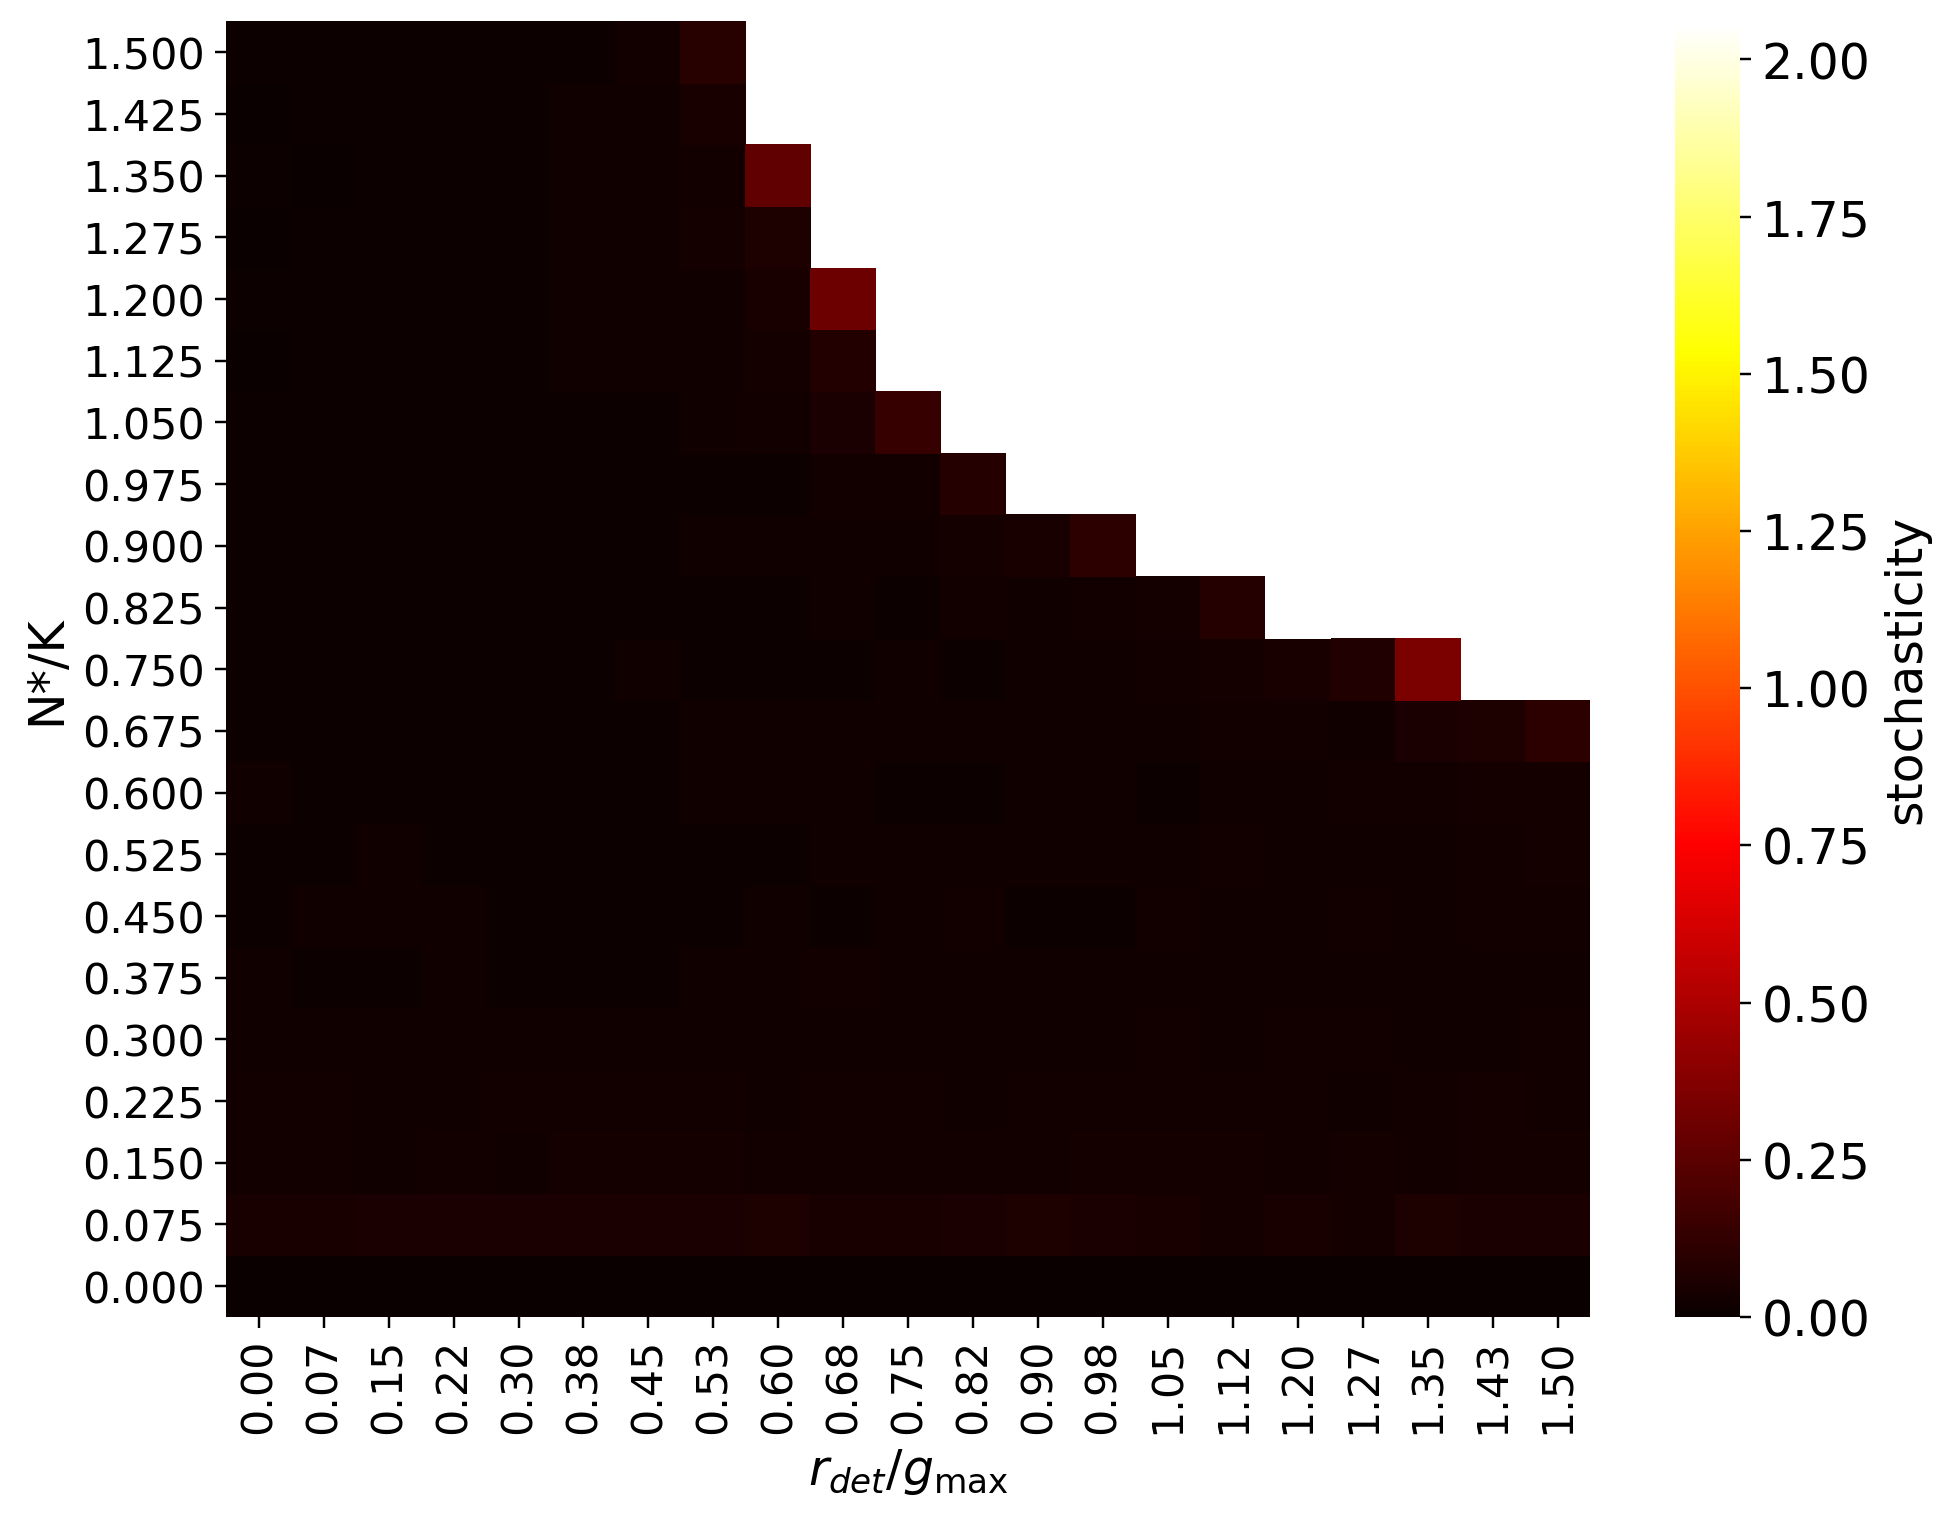

In [90]:
fig, ax = plt.subplots(dpi=220)
fig.set_size_inches(10, 7.8)
titleSize = 16
labelSize = 16
numbersize = 14
legendsize = 10
IDsize=12


# #this mask will only plot values between 15 and 20
# masko = (pivot < 15) | (pivot >= 20)

# #phase_mask = (pivot['det_ratio']) > 0.5

ax = sns.heatmap(pivot_stDev, annot=False, cmap='hot')
# ax_masked = sns.heatmap(pivot, mask=masko, cmap='Greens', cbar=False, annot=True)
# #ax_masked2 = sns.heatmap(pivot, mask=phase_mask, cmap='Blues', cbar=False, annot=True)

ax.invert_yaxis()
labels_x = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels(map(lambda x: "{:.2f}".format(float(x)), labels_x))
labels_y = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(map(lambda y: "{:.3f}".format(float(y)), labels_y))

# ax2 = ax.twiny()
# ax2.set_xlim(0.078, 0.92)
# ax2.axvline(x=phase2_lim/max_gRate, linewidth=4, color='r')
# print(phase2_lim/max_gRate)

ax.set_xlabel('$r_{det}/g_{\max}$', fontsize=labelSize)
ax.set_ylabel('N*/K', fontsize=labelSize)
ax.xaxis.set_tick_params(labelsize=numbersize)
# ax2.xaxis.set_tick_params(labelsize=numbersize+5)
ax.yaxis.set_tick_params(labelsize=numbersize)

# ax2.set_xticks([phase2_lim_scaled])
# ax2.set_xticklabels(["$\\frac{r_{imm}}{g_{\max}K}$"])

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelSize)
cbar.set_label("stochasticity", fontsize=labelSize)

#plt.savefig('plots/optimalNThreshAndRDet.pdf')
plt.show()